# DLBCL CLASSIFICATION USING GENE EXPRESSION DATA

In [1]:
import pandas as pd
data = pd.read_csv('DLBCL.csv')

In [2]:
data.head()

,Type,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000466_at,AB000467_at,AB000468_at,AB000584_at,AB000895_at,AB000896_at,AB000897_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,AB002315_at,AB002318_at,AB002365_at,AB002366_at,AB002380_at,AB002382_at,AB002409_at,AB002559_at,AB003102_at,AB003103_at,AB003177_at,AB003698_at,AB004884_at,AB006190_at,AC000061_cds2_at,AC000061_cds3_at,AC000062_at,AC000064_cds1_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,DLBCL,-1,-45,176,97,-57,233,265,945,56,819,-526,-1075,569,-501,-185,-28,-132,77,564,897,-40,169,1277,-80,-20,117,684,-6,500,864,109,838,332,762,548,368,-51,48,231,...,353,357,69,233,371,-92,21210,13993,1645,354,-341,12542,8233,298,11319,-72,229,778,16,409,41,111,234,354,71,286,575,-210,-1468,165,132,1036,-161,1523,-72,897,366,3,76,-28
1,DLBCL,25,-17,531,353,122,155,209,1688,42,639,-368,-253,892,71,157,-101,-68,136,562,623,4,278,956,193,17,344,768,226,390,912,223,904,270,668,619,248,-59,-18,153,...,328,7216,-27,333,287,-31,7490,15232,411,272,258,17542,14754,270,5700,-136,48,346,13,338,2,708,185,363,221,176,409,-262,-2333,2076,147,4254,-75,6056,-68,737,81,-4,41,-45
2,DLBCL,73,91,257,80,614,507,760,2252,196,863,-618,-596,1963,-226,-237,-133,29,116,999,861,55,539,1245,44,-2,224,597,275,1270,1976,320,1171,479,986,762,412,-65,22,424,...,172,5885,84,237,400,281,24760,14082,384,233,28,13338,15725,433,9175,-273,96,335,-31,318,35,453,112,263,266,299,630,-399,-2024,1468,169,1934,-129,2901,-9,946,450,38,164,-62
3,DLBCL,267,41,202,138,198,355,245,1469,170,384,-698,-31,1150,202,-541,162,-55,113,549,434,-51,418,900,47,15,226,430,89,476,1164,192,517,287,634,674,404,-122,21,154,...,224,2606,59,196,188,61,18747,17627,347,206,67,16591,9551,160,8049,-214,33,269,-23,224,1,335,-85,93,126,63,166,-99,-626,910,13,2469,93,2465,-119,339,321,-63,73,-13
4,DLBCL,16,24,187,39,145,254,571,930,-11,439,-665,-306,1460,117,-679,-61,-82,110,838,651,-74,201,454,0,-37,698,390,-17,461,815,342,444,345,648,587,198,-102,6,269,...,206,1408,-1,226,226,402,7871,14335,727,203,66,12369,5489,307,7405,-134,177,335,-8,248,24,170,-24,146,370,188,822,-29,-2380,350,69,608,-39,1667,-87,721,213,15,155,-26


In [3]:
print(data.values)

[['DLBCL' -1 -45 ... 3 76 -28]
 ['DLBCL' 25 -17 ... -4 41 -45]
 ['DLBCL' 73 91 ... 38 164 -62]
 ...
 ['FL' 83 -63 ... -221 -213 -318]
 ['FL' 27 -194 ... -97 -120 -291]
 ['FL' 3 123 ... -1 370 -53]]


In [4]:
data.head()

,Type,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000466_at,AB000467_at,AB000468_at,AB000584_at,AB000895_at,AB000896_at,AB000897_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,AB002315_at,AB002318_at,AB002365_at,AB002366_at,AB002380_at,AB002382_at,AB002409_at,AB002559_at,AB003102_at,AB003103_at,AB003177_at,AB003698_at,AB004884_at,AB006190_at,AC000061_cds2_at,AC000061_cds3_at,AC000062_at,AC000064_cds1_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,DLBCL,-1,-45,176,97,-57,233,265,945,56,819,-526,-1075,569,-501,-185,-28,-132,77,564,897,-40,169,1277,-80,-20,117,684,-6,500,864,109,838,332,762,548,368,-51,48,231,...,353,357,69,233,371,-92,21210,13993,1645,354,-341,12542,8233,298,11319,-72,229,778,16,409,41,111,234,354,71,286,575,-210,-1468,165,132,1036,-161,1523,-72,897,366,3,76,-28
1,DLBCL,25,-17,531,353,122,155,209,1688,42,639,-368,-253,892,71,157,-101,-68,136,562,623,4,278,956,193,17,344,768,226,390,912,223,904,270,668,619,248,-59,-18,153,...,328,7216,-27,333,287,-31,7490,15232,411,272,258,17542,14754,270,5700,-136,48,346,13,338,2,708,185,363,221,176,409,-262,-2333,2076,147,4254,-75,6056,-68,737,81,-4,41,-45
2,DLBCL,73,91,257,80,614,507,760,2252,196,863,-618,-596,1963,-226,-237,-133,29,116,999,861,55,539,1245,44,-2,224,597,275,1270,1976,320,1171,479,986,762,412,-65,22,424,...,172,5885,84,237,400,281,24760,14082,384,233,28,13338,15725,433,9175,-273,96,335,-31,318,35,453,112,263,266,299,630,-399,-2024,1468,169,1934,-129,2901,-9,946,450,38,164,-62
3,DLBCL,267,41,202,138,198,355,245,1469,170,384,-698,-31,1150,202,-541,162,-55,113,549,434,-51,418,900,47,15,226,430,89,476,1164,192,517,287,634,674,404,-122,21,154,...,224,2606,59,196,188,61,18747,17627,347,206,67,16591,9551,160,8049,-214,33,269,-23,224,1,335,-85,93,126,63,166,-99,-626,910,13,2469,93,2465,-119,339,321,-63,73,-13
4,DLBCL,16,24,187,39,145,254,571,930,-11,439,-665,-306,1460,117,-679,-61,-82,110,838,651,-74,201,454,0,-37,698,390,-17,461,815,342,444,345,648,587,198,-102,6,269,...,206,1408,-1,226,226,402,7871,14335,727,203,66,12369,5489,307,7405,-134,177,335,-8,248,24,170,-24,146,370,188,822,-29,-2380,350,69,608,-39,1667,-87,721,213,15,155,-26


## Checking to see if there is any missing values or not

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 7071 entries, Type to Z78285_f_at
dtypes: int64(7070), object(1)
memory usage: 4.2+ MB


In [6]:
data.describe()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000466_at,AB000467_at,AB000468_at,AB000584_at,AB000895_at,AB000896_at,AB000897_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,AB002315_at,AB002318_at,AB002365_at,AB002366_at,AB002380_at,AB002382_at,AB002409_at,AB002559_at,AB003102_at,AB003103_at,AB003177_at,AB003698_at,AB004884_at,AB006190_at,AC000061_cds2_at,AC000061_cds3_at,AC000062_at,AC000064_cds1_at,AC000064_cds2_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,117.467532,1.675325,439.844156,191.285714,156.285714,351.818182,331.194805,1579.051948,141.272727,714.584416,-677.168831,-623.532468,893.168831,-206.142857,-313.831169,-69.324675,-47.714286,154.155844,629.090909,971.000000,77.311688,306.116883,1019.207792,-12.753247,-189.389610,175.324675,674.246753,1528.051948,764.701299,1066.389610,181.324675,920.519481,297.597403,840.025974,725.311688,344.142857,-94.662338,-18.441558,325.649351,141.974026,...,255.857143,1236.311688,82.272727,262.636364,416.818182,267.077922,19589.532468,15246.610390,1827.155844,294.259740,128.337662,15157.662338,12983.805195,362.103896,7328.428571,-152.116883,118.233766,470.597403,2.220779,325.233766,81.298701,393.051948,168.077922,349.857143,183.675325,243.259740,516.844156,-86.246753,-1722.805195,611.194805,193.792208,1288.155844,-224.831169,1924.688312,-220.649351,787.350649,249.142857,-132.792208,26.805195,-195.337662
std,163.165769,160.380587,615.331662,167.230841,265.196047,262.099706,226.761876,813.137975,222.960206,492.225995,343.895195,517.471041,646.598212,414.168975,387.053628,132.555593,111.307878,171.062321,313.983455,524.145144,136.826365,161.460601,589.767111,110.831327,914.639851,159.403942,430.477035,2545.352012,371.572833,581.537032,147.529341,545.358009,191.950532,578.014318,249.419287,300.548302,59.923770,42.691825,183.892043,88.013901,...,173.706325,2742.927505,134.716529,99.110506,203.408891,471.700556,6277.739833,2921.305148,2388.277606,227.061689,252.845262,3605.784441,4344.694838,443.573574,4043.669365,102.986582,120.863766,297.164683,43.240948,180.653193,77.809664,399.161948,196.351911,238.273158,159.916956,131.339095,284.310665,159.532389,745.221038,654.451056,132.363270,899.104029,338.030612,2149.767969,287.278554,778.563873,305.609775,263.358038,239.679229,288.071154
min,-136.000000,-965.000000,34.000000,2.000000,-334.000000,-99.000000,10.000000,557.000000,-131.000000,138.000000,-1949.000000,-3533.000000,-158.000000,-1110.000000,-1329.000000,-431.000000,-494.000000,8.000000,87.000000,394.000000,-212.000000,-15.000000,-167.000000,-430.000000,-7972.000000,-88.000000,-358.000000,-165.000000,110.000000,295.000000,-41.000000,233.000000,2.000000,181.000000,334.000000,-1159.000000,-25

## Replacing categorical values with numaric value 

In [7]:
data['Type'] = data['Type'].replace(['DLBCL', 'FL'],[0, 1])

In [8]:
print(data.values)

[[   0   -1  -45 ...    3   76  -28]
 [   0   25  -17 ...   -4   41  -45]
 [   0   73   91 ...   38  164  -62]
 ...
 [   1   83  -63 ... -221 -213 -318]
 [   1   27 -194 ...  -97 -120 -291]
 [   1    3  123 ...   -1  370  -53]]


# Feature Extraction using Pearson's Correlation

In [9]:
data_new = data.drop(columns = "Type", axis = 1, inplace = False)

data_new.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000466_at,AB000467_at,AB000468_at,AB000584_at,AB000895_at,AB000896_at,AB000897_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,AB002315_at,AB002318_at,AB002365_at,AB002366_at,AB002380_at,AB002382_at,AB002409_at,AB002559_at,AB003102_at,AB003103_at,AB003177_at,AB003698_at,AB004884_at,AB006190_at,AC000061_cds2_at,AC000061_cds3_at,AC000062_at,AC000064_cds1_at,AC000064_cds2_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-1,-45,176,97,-57,233,265,945,56,819,-526,-1075,569,-501,-185,-28,-132,77,564,897,-40,169,1277,-80,-20,117,684,-6,500,864,109,838,332,762,548,368,-51,48,231,102,...,353,357,69,233,371,-92,21210,13993,1645,354,-341,12542,8233,298,11319,-72,229,778,16,409,41,111,234,354,71,286,575,-210,-1468,165,132,1036,-161,1523,-72,897,366,3,76,-28
1,25,-17,531,353,122,155,209,1688,42,639,-368,-253,892,71,157,-101,-68,136,562,623,4,278,956,193,17,344,768,226,390,912,223,904,270,668,619,248,-59,-18,153,73,...,328,7216,-27,333,287,-31,7490,15232,411,272,258,17542,14754,270,5700,-136,48,346,13,338,2,708,185,363,221,176,409,-262,-2333,2076,147,4254,-75,6056,-68,737,81,-4,41,-45
2,73,91,257,80,614,507,760,2252,196,863,-618,-596,1963,-226,-237,-133,29,116,999,861,55,539,1245,44,-2,224,597,275,1270,1976,320,1171,479,986,762,412,-65,22,424,115,...,172,5885,84,237,400,281,24760,14082,384,233,28,13338,15725,433,9175,-273,96,335,-31,318,35,453,112,263,266,299,630,-399,-2024,1468,169,1934,-129,2901,-9,946,450,38,164,-62
3,267,41,202,138,198,355,245,1469,170,384,-698,-31,1150,202,-541,162,-55,113,549,434,-51,418,900,47,15,226,430,89,476,1164,192,517,287,634,674,404,-122,21,154,174,...,224,2606,59,196,188,61,18747,17627,347,206,67,16591,9551,160,8049,-214,33,269,-23,224,1,335,-85,93,126,63,166,-99,-626,910,13,2469,93,2465,-119,339,321,-63,73,-13
4,16,24,187,39,145,254,571,930,-11,439,-665,-306,1460,117,-679,-61,-82,110,838,651,-74,201,454,0,-37,698,390,-17,461,815,342,444,345,648,587,198,-102,6,269,151,...,206,1408,-1,226,226,402,7871,14335,727,203,66,12369,5489,307,7405,-134,177,335,-8,248,24,170,-24,146,370,188,822,-29,-2380,350,69,608,-39,1667,-87,721,213,15,155,-26


In [10]:
corr_matrix = data.corr()
corr = corr_matrix['Type'].sort_values(ascending=False)[:21]
corr = corr * 100
corr

Type                100.000000
X16983_at            58.751652
AB002409_at          57.546523
Z21966_at            54.472874
D87119_at            52.681907
Z11793_at            51.674322
U46006_s_at          50.845247
L27071_at            49.538533
L42324_at            49.420966
U56102_at            48.766805
HG3928-HT4198_at     48.301638
M59829_at            48.083571
M37815_cds1_at       47.874228
S73591_at            47.655593
L19314_at            46.522513
U61262_at            46.441291
X86098_at            46.298243
M63379_at            46.107133
Z30426_at            46.104760
X85785_rna1_at       46.023899
Z35227_at            45.975976
Name: Type, dtype: float64

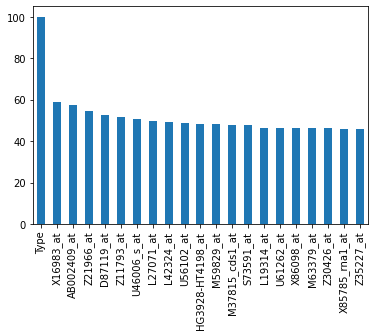

In [11]:
corr.plot(kind = 'bar')

In [12]:
# feature selection as mentioned in the research paper (top 100 radviz visualizations with 8 attributes)

# list_gene = list(corr.index)

list_gene = ['Type',
'X16983_at',
'X02152_at',
'M94880_f_at',
'Z21966_at',
'J03909_at',
'D87119_at',
'HG417-HT417_s_at',
'M22382_at',
'L17131_rna1_at',
'L42324_at',
'X56494_at',
'M63138_at',
'Z11793_at',
'D82348_at',
'AB002409_at',
'HG1980-HT2023_at',
'M14328_s_at',
'J04173_at',
'X03689_s_at',
'D78134_at']


data_new = data[list_gene]

data_new.head()

,Type,X16983_at,X02152_at,M94880_f_at,Z21966_at,J03909_at,D87119_at,HG417-HT417_s_at,M22382_at,L17131_rna1_at,L42324_at,X56494_at,M63138_at,Z11793_at,D82348_at,AB002409_at,HG1980-HT2023_at,M14328_s_at,J04173_at,X03689_s_at,D78134_at
0,0,42,14742,8233,156,6921,318,7502,5161,4413,622,7578,5011,241,1494,-6,4351,12813,8286,22040,2072
1,0,12,12641,14754,-12,10405,1071,16768,5962,10383,551,11102,13372,1861,3449,226,8607,13190,6669,506,3468
2,0,30,12730,15725,-48,8512,1013,19206,8218,9152,1434,11284,11535,690,3889,275,11118,13540,7782,12267,3177
3,0,-43,9872,9551,-73,10594,922,10944,6911,3800,311,9979,10640,825,3380,89,9791,17157,9196,3392,1674
4,0,80,18742,5489,-82,824,692,7238,16467,3905,581,4553,2654,259,3890,-17,6162,12063,9711,6962,1180


In [13]:
data_new.shape

(77, 21)

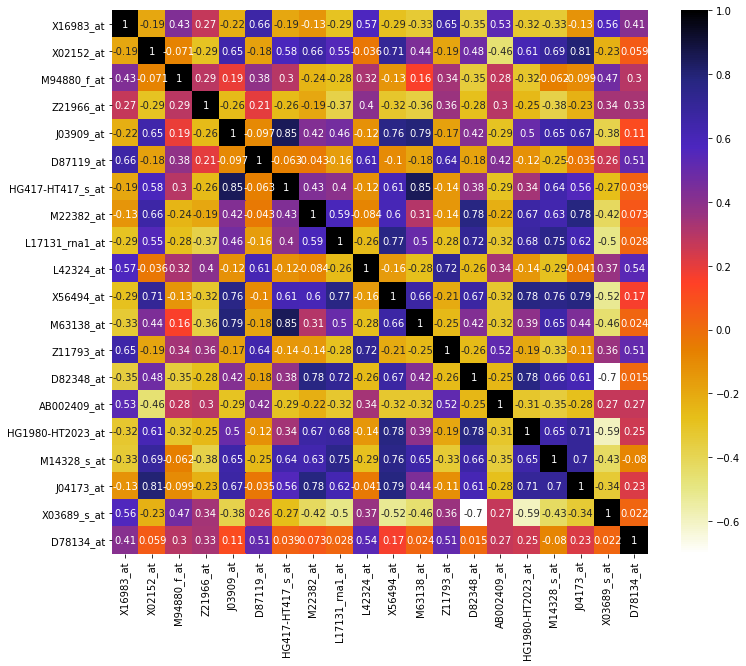

In [14]:
# Correlation plotting of the 20 highest attributes using Pearson Correlation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
cor = data_new.drop("Type", axis = 1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# CASE 1: Using 50% of the dataset as training set and 50% of the dataset as test set.

# 1.0.Train-Test Split (50:50)

In [15]:
from sklearn.model_selection import train_test_split
train_set_1, test_set_1 = train_test_split(data_new, train_size = 0.51, random_state = 42)

In [16]:
print(f"Rows in train set: {len(train_set_1)}\nRows in test set: {len(test_set_1)}")

Rows in train set: 39
Rows in test set: 38


In [17]:
train_set_1.head()

,Type,X16983_at,X02152_at,M94880_f_at,Z21966_at,J03909_at,D87119_at,HG417-HT417_s_at,M22382_at,L17131_rna1_at,L42324_at,X56494_at,M63138_at,Z11793_at,D82348_at,AB002409_at,HG1980-HT2023_at,M14328_s_at,J04173_at,X03689_s_at,D78134_at
55,0,33,4228,9733,67,2035,475,4621,2510,3650,426,2175,1955,1307,636,557,2248,2517,3800,22224,1233
3,0,-43,9872,9551,-73,10594,922,10944,6911,3800,311,9979,10640,825,3380,89,9791,17157,9196,3392,1674
17,0,36,14990,10862,211,5793,177,7341,10672,5526,1827,10938,3836,523,2973,301,4223,9469,9195,23295,1503
38,0,-61,3713,10249,-293,9215,858,13423,2619,3361,416,6623,11055,349,1615,896,3820,8849,3401,861,2304
8,0,24,9841,5392,181,4577,228,6111,10971,10917,389,7082,6837,449,7795,426,13893,12390,11000,-482,4040


In [18]:
test_set_1.head()

,Type,X16983_at,X02152_at,M94880_f_at,Z21966_at,J03909_at,D87119_at,HG417-HT417_s_at,M22382_at,L17131_rna1_at,L42324_at,X56494_at,M63138_at,Z11793_at,D82348_at,AB002409_at,HG1980-HT2023_at,M14328_s_at,J04173_at,X03689_s_at,D78134_at
4,0,80,18742,5489,-82,824,692,7238,16467,3905,581,4553,2654,259,3890,-17,6162,12063,9711,6962,1180
35,0,113,7207,20028,81,11354,802,20974,4598,4008,728,6341,15733,1972,1437,3966,3193,13687,5876,21195,3751
10,0,3,6672,2532,-95,1340,258,2516,10123,10767,792,9058,6016,278,5578,199,11882,13887,6986,4657,3410
0,0,42,14742,8233,156,6921,318,7502,5161,4413,622,7578,5011,241,1494,-6,4351,12813,8286,22040,2072
45,0,330,19547,15254,-37,10261,3355,14348,12552,10482,2566,13529,5137,3811,3322,3150,10605,14153,14080,23908,5293


In [19]:
X_train_1 = train_set_1.drop("Type", axis = 1)
y_train_1 = train_set_1["Type"]
X_test_1 = test_set_1.drop("Type", axis = 1)
y_test_1 = test_set_1["Type"]

# 1.1.Confusion Matrix Heatmap of perfect predictions

In [20]:
labels = ["DLBCL", "FL"]

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

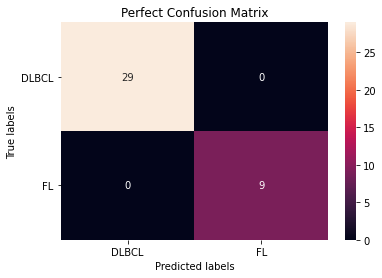

In [21]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_1), ax = ax, annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Perfect Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 1.2.Using Logistic Regression model

In [23]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='lbfgs', max_iter=400)
model_1.fit(X_train_1, y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr_score_1 = model_1.score(X_train_1, y_train_1)

In [25]:
print(f"Score: {round((lr_score_1*100), 2)}%")

Score: 100.0%


In [26]:
y_test_pred_1 = model_1.predict(X_test_1)

## 1.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [27]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_1)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_1)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_1)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_1)*100), 2)}%")

Accuracy: 92.11%
Precision: 75.0%
Recall: 100.0%
F1_score: 85.71%


## 1.2.2.Classification Report of the Logistic Regressor

In [28]:
print(classification_report(y_test_1, y_test_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.75      1.00      0.86         9

    accuracy                           0.92        38
   macro avg       0.88      0.95      0.90        38
weighted avg       0.94      0.92      0.92        38



## 1.2.3.Confusion Matrix Heatmap of the Logistic Regressor

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

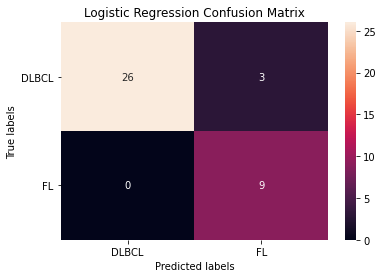

In [29]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_1), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.3.Using SVM model

In [30]:
from sklearn.svm import SVC
svm_clf_1 = SVC()
svm_clf_1.fit(X_train_1, y_train_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
svm_score_1 = svm_clf_1.score(X_train_1, y_train_1)

In [32]:
print(f"Score: {round((svm_score_1*100), 2)}%")

Score: 94.87%


In [33]:
y_test_pred_11 = svm_clf_1.predict(X_test_1)

## 1.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [34]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_11)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_11)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_11)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_11)*100), 2)}%")

Accuracy: 94.74%
Precision: 81.82%
Recall: 100.0%
F1_score: 90.0%


## 1.3.2.Classification Report of the SVM model

In [35]:
print(classification_report(y_test_1, y_test_pred_11))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.91      0.97      0.93        38
weighted avg       0.96      0.95      0.95        38



## 1.3.3.Confusion Matrix Heatmap of the SVM model

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

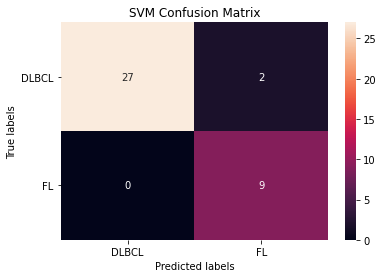

In [36]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_11), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.4.Using Naive Bayes model

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb_1 = GaussianNB()
gnb_1.fit(X_train_1, y_train_1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
gnb_score_1 = gnb_1.score(X_train_1, y_train_1)

In [39]:
print(f"Score: {round((gnb_score_1*100), 2)}%")

Score: 97.44%


In [40]:
y_test_pred_12 = gnb_1.predict(X_test_1)

## 1.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [41]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_12)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_12)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_12)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_12)*100), 2)}%")

Accuracy: 94.74%
Precision: 81.82%
Recall: 100.0%
F1_score: 90.0%


## 1.4.2.Classification Report of the Naive Bayes model

In [42]:
print(classification_report(y_test_1, y_test_pred_12))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.91      0.97      0.93        38
weighted avg       0.96      0.95      0.95        38



## 1.4.3.Confusion Matrix Heatmap of the Naive Bayes model

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

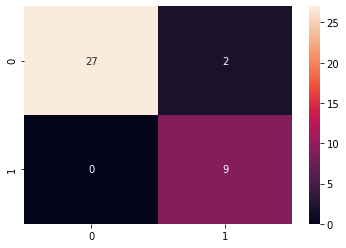

In [43]:
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_12), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.5.Using XGBoost model

In [44]:
from xgboost import XGBClassifier
xgb_clf_1 = XGBClassifier(use_label_encoder = False, eval_metric='mlogloss')
xgb_clf_1.fit(X_train_1, y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

In [45]:
xgb_score_1 = xgb_clf_1.score(X_train_1, y_train_1)

In [46]:
print(f"Score: {round((xgb_score_1*100), 2)}%")

Score: 100.0%


In [47]:
y_test_pred_13 = xgb_clf_1.predict(X_test_1)

## 1.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [48]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_13)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_13)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_13)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_13)*100), 2)}%")

Accuracy: 78.95%
Precision: 57.14%
Recall: 44.44%
F1_score: 50.0%


## 1.5.2.Classification Report of the XGBoost model

In [49]:
print(classification_report(y_test_1, y_test_pred_13))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.57      0.44      0.50         9

    accuracy                           0.79        38
   macro avg       0.71      0.67      0.68        38
weighted avg       0.78      0.79      0.78        38



## 1.5.3.Confusion Matrix Heatmap of the XGBoost model

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

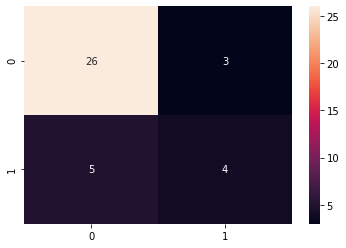

In [50]:
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_13), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.6.Using Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf_1 = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc_clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
rfc_score_1 = rfc_clf_1.score(X_train_1, y_train_1)

In [53]:
print(f"Score: {round((rfc_score_1*100), 2)}%")

Score: 100.0%


In [54]:
y_test_pred_14 = rfc_clf_1.predict(X_test_1)

## 1.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [55]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_14)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_14)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_14)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_14)*100), 2)}%")

Accuracy: 92.11%
Precision: 80.0%
Recall: 88.89%
F1_score: 84.21%


## 1.6.2.Classification Report of this Random Forest Classifier

In [56]:
print(classification_report(y_test_1, y_test_pred_14))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.80      0.89      0.84         9

    accuracy                           0.92        38
   macro avg       0.88      0.91      0.89        38
weighted avg       0.93      0.92      0.92        38



## 1.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

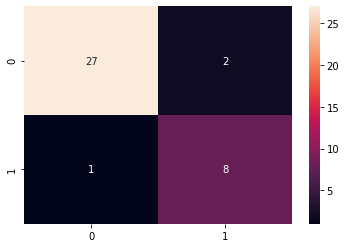

In [57]:
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_14), annot = True)

# CASE 2: Using 70% of the dataset as training set and 30% of the dataset as test set.

# 2.0.Train-Test Split (70:30)

In [58]:
train_set_2, test_set_2 = train_test_split(data_new, test_size = 0.3, random_state = 42)

In [59]:
print(f"Rows in train set: {len(train_set_2)}\nRows in test set: {len(test_set_2)}")

Rows in train set: 53
Rows in test set: 24


In [60]:
train_set_2.head()

,Type,X16983_at,X02152_at,M94880_f_at,Z21966_at,J03909_at,D87119_at,HG417-HT417_s_at,M22382_at,L17131_rna1_at,L42324_at,X56494_at,M63138_at,Z11793_at,D82348_at,AB002409_at,HG1980-HT2023_at,M14328_s_at,J04173_at,X03689_s_at,D78134_at
65,1,224,4705,14043,431,1793,1091,3681,3835,2821,2128,2799,2746,2705,1157,5664,1912,8499,5075,22779,6028
54,0,147,17268,14552,-8,6459,635,11085,8760,7671,3611,8362,9942,4109,3085,-22,6362,15067,7278,20081,3927
31,0,9,14625,15976,-31,5844,280,14388,4565,7602,210,7900,7077,394,1778,123,3128,14738,7646,20078,1582
7,0,91,1030,8796,95,5600,1038,4063,9394,11191,640,7898,4841,1265,3612,7631,3742,12873,6991,6122,2148
62,1,88,2004,14907,179,1241,1446,1378,1921,1738,1322,2565,318,1786,474,2367,988,1788,3412,24722,4018


In [61]:
test_set_2.head()

,Type,X16983_at,X02152_at,M94880_f_at,Z21966_at,J03909_at,D87119_at,HG417-HT417_s_at,M22382_at,L17131_rna1_at,L42324_at,X56494_at,M63138_at,Z11793_at,D82348_at,AB002409_at,HG1980-HT2023_at,M14328_s_at,J04173_at,X03689_s_at,D78134_at
4,0,80,18742,5489,-82,824,692,7238,16467,3905,581,4553,2654,259,3890,-17,6162,12063,9711,6962,1180
35,0,113,7207,20028,81,11354,802,20974,4598,4008,728,6341,15733,1972,1437,3966,3193,13687,5876,21195,3751
10,0,3,6672,2532,-95,1340,258,2516,10123,10767,792,9058,6016,278,5578,199,11882,13887,6986,4657,3410
0,0,42,14742,8233,156,6921,318,7502,5161,4413,622,7578,5011,241,1494,-6,4351,12813,8286,22040,2072
45,0,330,19547,15254,-37,10261,3355,14348,12552,10482,2566,13529,5137,3811,3322,3150,10605,14153,14080,23908,5293


In [62]:
X_train_2 = train_set_2.drop("Type", axis = 1)
y_train_2 = train_set_2["Type"]
X_test_2 = test_set_2.drop("Type", axis = 1)
y_test_2 = test_set_2["Type"]

# 2.1.Confusion Matrix Heatmap of perfect predictions

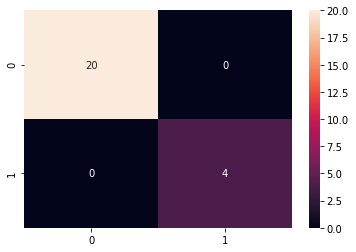

In [63]:
sns.heatmap(confusion_matrix(y_test_2, y_test_2), annot = True)

# 2.2.Using Logistic Regression model

In [64]:
model_2 = LogisticRegression(solver='lbfgs', max_iter=500)
model_2.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
lr_score_2 = model_2.score(X_train_2, y_train_2)

In [66]:
print(f"Score: {round((lr_score_2*100), 2)}%")

Score: 100.0%


In [67]:
y_test_pred_2 = model_2.predict(X_test_2)

## 2.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [68]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_2)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_2)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_2)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_2)*100), 2)}%")

Accuracy: 95.83%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 2.2.2.Classification Report of the Logistic Regressor

In [69]:
print(classification_report(y_test_2, y_test_pred_2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.80      1.00      0.89         4

    accuracy                           0.96        24
   macro avg       0.90      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



## 2.2.3.Confusion Matrix Heatmap of the Logistic Regressor

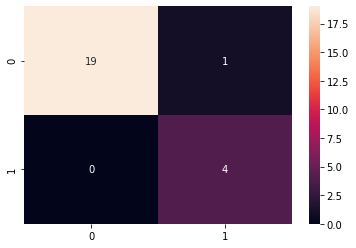

In [70]:
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_2), annot = True)

# 2.3.Using SVM model

In [71]:
svm_clf_2 = SVC()
svm_clf_2.fit(X_train_2, y_train_2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
svm_score_2 = svm_clf_2.score(X_train_2, y_train_2)

In [73]:
print(f"Score: {round((svm_score_2*100), 2)}%")

Score: 94.34%


In [74]:
y_test_pred_21 = svm_clf_2.predict(X_test_2)

## 2.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [75]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_21)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_21)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_21)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_21)*100), 2)}%")

Accuracy: 95.83%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 2.3.2.Classification Report of the SVM model

In [76]:
print(classification_report(y_test_2, y_test_pred_21))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.80      1.00      0.89         4

    accuracy                           0.96        24
   macro avg       0.90      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



## 2.3.3.Confusion Matrix Heatmap of the SVM model

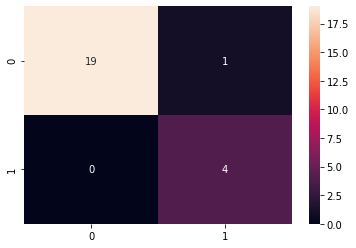

In [77]:
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_21), annot = True)

# 2.4.Using Naive Bayes model

In [78]:
gnb_2 = GaussianNB()
gnb_2.fit(X_train_2, y_train_2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
gnb_score_2 = gnb_2.score(X_train_2, y_train_2)

In [80]:
print(f"Score: {round((gnb_score_2*100), 2)}%")

Score: 96.23%


In [81]:
y_test_pred_22 = gnb_2.predict(X_test_2)

## 2.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [82]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_22)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_22)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_22)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_22)*100), 2)}%")

Accuracy: 95.83%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 2.4.2.Classification Report of the Naive Bayes model

In [83]:
print(classification_report(y_test_2, y_test_pred_22))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.80      1.00      0.89         4

    accuracy                           0.96        24
   macro avg       0.90      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



## 2.4.3.Confusion Matrix Heatmap of the Naive Bayes model

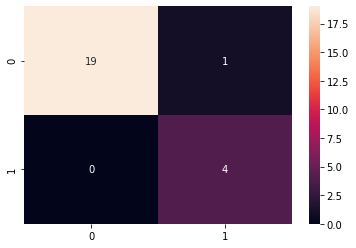

In [84]:
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_22), annot = True)

# 2.5.Using XGBoost model

In [85]:
xgb_clf_2 = XGBClassifier(use_label_encoder = False, eval_metric='mlogloss')
xgb_clf_2.fit(X_train_2, y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

In [86]:
xgb_score_2 = xgb_clf_2.score(X_train_2, y_train_2)

In [87]:
print(f"Score: {round((xgb_score_2*100), 2)}%")

Score: 100.0%


In [88]:
y_test_pred_23 = xgb_clf_2.predict(X_test_2)

## 2.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [89]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_23)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_23)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_23)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_23)*100), 2)}%")

Accuracy: 83.33%
Precision: 50.0%
Recall: 25.0%
F1_score: 33.33%


## 2.5.2.Classification Report of the XGBoost model

In [90]:
print(classification_report(y_test_2, y_test_pred_23))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.50      0.25      0.33         4

    accuracy                           0.83        24
   macro avg       0.68      0.60      0.62        24
weighted avg       0.80      0.83      0.81        24



## 2.5.3.Confusion Matrix Heatmap of the XGBoost model

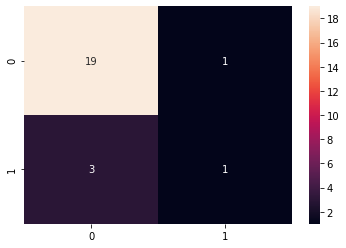

In [91]:
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_23), annot = True)

# 2.6.Using Random Forest Classifier

In [92]:
rfc_clf_2 = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc_clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [93]:
rfc_score_2 = rfc_clf_2.score(X_train_2, y_train_2)

In [94]:
print(f"Score: {round((rfc_score_2*100), 2)}%")

Score: 100.0%


In [95]:
y_test_pred_24 = rfc_clf_2.predict(X_test_2)

## 2.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [96]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_24)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_24)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_24)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_24)*100), 2)}%")

Accuracy: 87.5%
Precision: 66.67%
Recall: 50.0%
F1_score: 57.14%


## 2.6.2.Classification Report of this Random Forest Classifier

In [97]:
print(classification_report(y_test_2, y_test_pred_24))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.67      0.50      0.57         4

    accuracy                           0.88        24
   macro avg       0.79      0.72      0.75        24
weighted avg       0.87      0.88      0.87        24



## 2.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

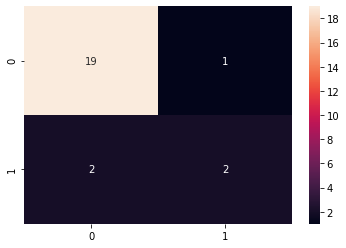

In [98]:
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_24), annot = True)

# CASE 3: Using 80% of the dataset as training set and 20% of the dataset as test set.

# 3.0.Train-Test Split (80:20)

In [99]:
train_set_3, test_set_3 = train_test_split(data_new, test_size = 0.2, random_state = 42)

In [100]:
print(f"Rows in train set: {len(train_set_3)}\nRows in test set: {len(test_set_3)}")

Rows in train set: 61
Rows in test set: 16


In [101]:
train_set_3.head()

,Type,X16983_at,X02152_at,M94880_f_at,Z21966_at,J03909_at,D87119_at,HG417-HT417_s_at,M22382_at,L17131_rna1_at,L42324_at,X56494_at,M63138_at,Z11793_at,D82348_at,AB002409_at,HG1980-HT2023_at,M14328_s_at,J04173_at,X03689_s_at,D78134_at
9,0,-12,14099,14676,158,13139,468,18791,5627,10307,562,12693,13274,1684,4208,197,7998,12985,6930,77,2812
5,0,-42,11217,13856,42,14710,427,17948,8072,9065,485,13584,15061,266,2875,441,5183,14997,9419,1408,2847
34,0,-9,6553,5840,70,3728,259,4196,6913,8075,198,4342,3751,127,3662,543,6979,8566,4786,-552,2466
22,0,86,13342,8043,139,3660,784,5362,8189,3361,1968,1974,2885,1441,1458,143,6337,6163,6145,21943,1628
30,0,66,17953,14176,200,11388,638,13995,9200,9770,1207,12238,7393,1744,3468,41,7450,14341,12791,21960,1361


In [102]:
test_set_3.head()

,Type,X16983_at,X02152_at,M94880_f_at,Z21966_at,J03909_at,D87119_at,HG417-HT417_s_at,M22382_at,L17131_rna1_at,L42324_at,X56494_at,M63138_at,Z11793_at,D82348_at,AB002409_at,HG1980-HT2023_at,M14328_s_at,J04173_at,X03689_s_at,D78134_at
4,0,80,18742,5489,-82,824,692,7238,16467,3905,581,4553,2654,259,3890,-17,6162,12063,9711,6962,1180
35,0,113,7207,20028,81,11354,802,20974,4598,4008,728,6341,15733,1972,1437,3966,3193,13687,5876,21195,3751
10,0,3,6672,2532,-95,1340,258,2516,10123,10767,792,9058,6016,278,5578,199,11882,13887,6986,4657,3410
0,0,42,14742,8233,156,6921,318,7502,5161,4413,622,7578,5011,241,1494,-6,4351,12813,8286,22040,2072
45,0,330,19547,15254,-37,10261,3355,14348,12552,10482,2566,13529,5137,3811,3322,3150,10605,14153,14080,23908,5293


In [103]:
X_train_3 = train_set_3.drop("Type", axis = 1)
y_train_3 = train_set_3["Type"]
X_test_3 = test_set_3.drop("Type", axis = 1)
y_test_3 = test_set_3["Type"]

# 3.1.Confusion Matrix Heatmap of perfect predictions

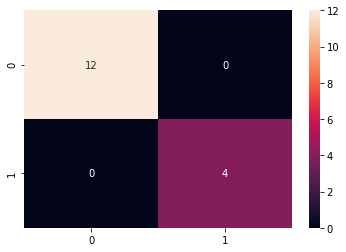

In [104]:
sns.heatmap(confusion_matrix(y_test_3, y_test_3), annot = True)

# 3.2.Using Logistic Regression model

In [105]:
model_3 = LogisticRegression(solver='lbfgs', max_iter=500)
model_3.fit(X_train_3, y_train_3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
lr_score_3 = model_3.score(X_train_3, y_train_3)

In [107]:
print(f"Score: {round((lr_score_3*100), 2)}%")

Score: 100.0%


In [108]:
y_test_pred_3 = model_3.predict(X_test_3)

## 3.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [109]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_3)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_3)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_3)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_3)*100), 2)}%")

Accuracy: 93.75%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 3.2.2.Classification Report of the Logistic Regressor

In [110]:
print(classification_report(y_test_3, y_test_pred_3))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



## 3.2.3.Confusion Matrix Heatmap of the Logistic Regressor

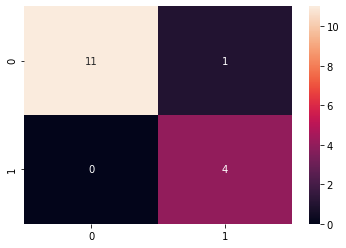

In [111]:
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_3), annot = True)

# 3.3.Using SVM model

In [112]:
svm_clf_3 = SVC()
svm_clf_3.fit(X_train_3, y_train_3)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
svm_score_3 = svm_clf_3.score(X_train_3, y_train_3)

In [114]:
print(f"Score: {round((svm_score_3*100), 2)}%")

Score: 98.36%


In [115]:
y_test_pred_31 = svm_clf_3.predict(X_test_3)

## 3.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [116]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_31)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_31)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_31)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_31)*100), 2)}%")

Accuracy: 93.75%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 3.3.2.Classification Report of the SVM model

In [117]:
print(classification_report(y_test_3, y_test_pred_31))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



## 3.3.3.Confusion Matrix Heatmap of the SVM model

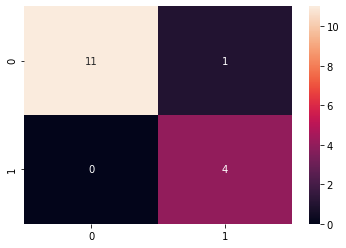

In [118]:
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_31), annot = True)

# 3.4.Using Naive Bayes model

In [119]:
gnb_3 = GaussianNB()
gnb_3.fit(X_train_3, y_train_3)

GaussianNB(priors=None, var_smoothing=1e-09)

In [120]:
gnb_score_3 = gnb_3.score(X_train_3, y_train_3)

In [121]:
print(f"Score: {round((gnb_score_3*100), 2)}%")

Score: 96.72%


In [122]:
y_test_pred_32 = gnb_3.predict(X_test_3)

## 3.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [123]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_32)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_32)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_32)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_32)*100), 2)}%")

Accuracy: 93.75%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 3.4.2.Classification Report of the Naive Bayes model

In [124]:
print(classification_report(y_test_3, y_test_pred_32))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



## 3.4.3.Confusion Matrix Heatmap of the Naive Bayes model

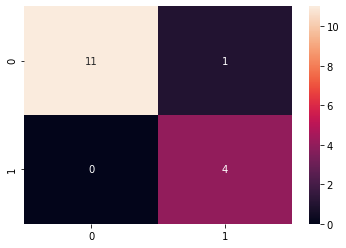

In [125]:
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_32), annot = True)

# 3.5.Using XGBoost model

In [126]:
xgb_clf_3 = XGBClassifier(use_label_encoder = False, eval_metric='mlogloss')
xgb_clf_3.fit(X_train_3, y_train_3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

In [127]:
xgb_score_3 = xgb_clf_3.score(X_train_3, y_train_3)

In [128]:
print(f"Score: {round((xgb_score_3*100), 2)}%")

Score: 100.0%


In [129]:
y_test_pred_33 = xgb_clf_3.predict(X_test_3)

## 3.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [130]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_33)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_33)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_33)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_33)*100), 2)}%")

Accuracy: 81.25%
Precision: 66.67%
Recall: 50.0%
F1_score: 57.14%


## 3.5.2.Classification Report of the XGBoost model

In [131]:
print(classification_report(y_test_3, y_test_pred_33))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.67      0.50      0.57         4

    accuracy                           0.81        16
   macro avg       0.76      0.71      0.73        16
weighted avg       0.80      0.81      0.80        16



## 3.5.3.Confusion Matrix Heatmap of the XGBoost model

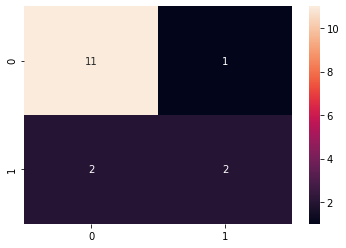

In [132]:
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_33), annot = True)

# 3.6.Using Random Forest Classifier

In [133]:
rfc_clf_3 = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc_clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [134]:
rfc_score_3 = rfc_clf_3.score(X_train_1, y_train_1)

In [135]:
print(f"Score: {round((rfc_score_3*100), 2)}%")

Score: 100.0%


In [136]:
y_test_pred_34 = rfc_clf_3.predict(X_test_3)

## 3.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [137]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_34)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_34)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_34)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_34)*100), 2)}%")

Accuracy: 81.25%
Precision: 66.67%
Recall: 50.0%
F1_score: 57.14%


## 3.6.2.Classification Report of this Random Forest Classifier

In [138]:
print(classification_report(y_test_3, y_test_pred_34))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.67      0.50      0.57         4

    accuracy                           0.81        16
   macro avg       0.76      0.71      0.73        16
weighted avg       0.80      0.81      0.80        16



## 3.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

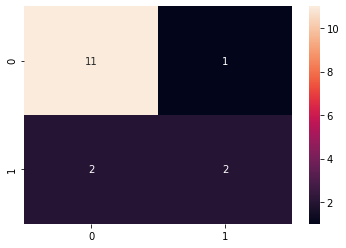

In [139]:
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_34), annot = True)